# Generating A PDF For a Real Event-Based Pitch Angle

In [94]:
import sys
sys.path.append("../")

from __init__ import *
from data_tools import *
from testing import *

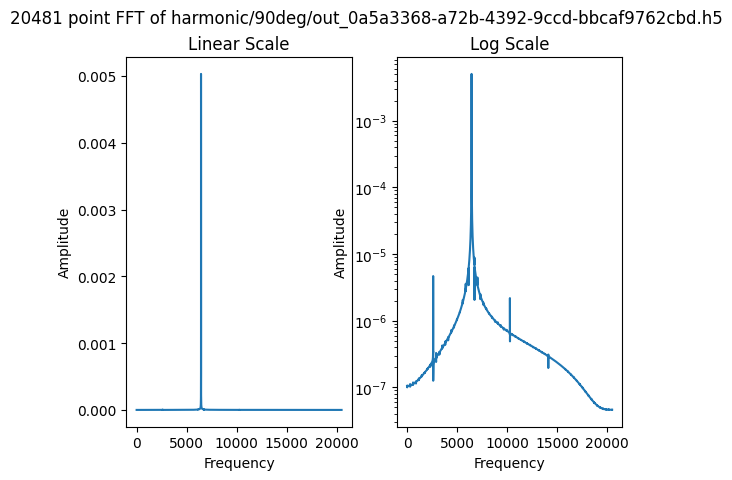

Maximum Signal Frequency:  0.005031617649422763
Maximum Signal Frequency Index:  6435
Maximum Signal Frequency:  (-0.004574610583043879+0.00209525993220068j)


In [95]:
file = "harmonic/90deg/out_0a5a3368-a72b-4392-9ccd-bbcaf9762cbd.h5"
signal_strings, attributes, attrs_container = get_attributes(file)
signal = get_signal(file, 'signal1')
signal_FFT = np.fft.rfft(signal)

# Make two plots side by side with log y scale and no log y scale

title = str(len(signal_FFT)) + " point FFT of " + file


fig, axs = plt.subplots(1,2)
fig.suptitle(title)

axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Linear Scale')

axs[0].plot(abs(signal_FFT))
axs[1].plot(abs(signal_FFT))
axs[1].set_yscale('log')

axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Log Scale')  

plt.show();

signal_max = np.max(abs(signal_FFT))
signal_max_index = np.argmax(abs(signal_FFT))
complex_signal_max = signal_FFT[signal_max_index]

print("Maximum Signal Frequency: ", np.max(abs(signal_FFT)))
print("Maximum Signal Frequency Index: ", np.argmax(abs(signal_FFT)))

print("Maximum Signal Frequency: ", signal_FFT[np.argmax(abs(signal_FFT))])


In [96]:
attrs_container

[[0.7033999999999999,
  18906405034.83456,
  157118712.64702606,
  18575.0,
  18749286322.187534,
  90.0,
  array([1.02010658e-05, 1.72117467e-03, 0.00000000e+00]),
  array([-7.80601793e+07,  1.00433840e+07,  4.81920734e-09]),
  1e-09,
  595.469606182224,
  108.22536124357357,
  0.02,
  0.006],
 [0.7033999999999999,
  18906405034.83456,
  0.0,
  18575.0,
  18749286322.187534,
  90.0,
  array([1.02010658e-05, 1.72117467e-03, 0.00000000e+00]),
  array([-7.80601793e+07,  1.00433840e+07,  4.81920734e-09]),
  1e-09,
  595.469606182224,
  108.22536124357357,
  0.02,
  0.006]]

In [42]:
# Calculating Background CDF 
def background_cdf(x, N, var):
    return (1 - np.exp( - 1 * (x ** 2) / var)) ** (N)

# Calculating Background CDF with N_sample (number of bins) taken into account
def background_cdf_awk(x, n_signal, n_sample, var):
    
    N = n_sample - ak.to_numpy(n_signal)
    
    return (1 - np.exp( - 1 * (x ** 2) / var)) ** (N[:, np.newaxis])

# def rician_pdf(x, var, loc_val):
    
#     x = x[np.newaxis, :]
#     loc_val = loc_val[:, np.newaxis]
    
#     return x * np.exp( -1 * (x ** 2 + loc_val ** 2) / var ) * special.iv(0, x * 2 * loc_val / var)

# # def cdf_from_pdf(x, pdf):
    
# #     cdf = np.zeros((pdf.shape[0], x.size))
# #     for i in range(x.size):
        
# #         cdf[:, i] = np.trapz(pdf[:, 0:i+1], x[0:i+1], axis=-1)
        
# #     return cdf

# # def combine_batch_cdf(cdf, counts):
    
# #     count = 0
# #     cdf_ak = []
# #     for n in counts:
# #         cdf_ak.append(cdf[count:count+n, :])
# #         count+=n
# #     cdf_ak = ak.Array(cdf_ak)
        
# #     return ak.to_numpy(ak.prod(cdf_ak, axis=1))

# # def get_spectra_peaks(freq_spectra, threshold):
    
# #     peaks = []
# #     for i in range(freq_spectra.shape[0]):
# #         i_peak_inds = np.where(abs(freq_spectra[i, :]) > threshold)[0]
# #         i_peaks = abs(freq_spectra[i, i_peak_inds])

# #         peaks.append(list(i_peaks))
    
# #     return ak.Array(peaks)
    
# # def generate_signal_cdf(peaks, x, var, n_sample, batchsize=1000):
    
# #     peak_counts = ak.num(peaks, axis=1)
# #     num_spectra = ak.num(peaks, axis=0)
    
# #     spectra_inds = np.arange(0, num_spectra, 1)
# #     combined_cdf = np.zeros((num_spectra, x.size))
    
# #     for i, spectra_batch in enumerate(np.array_split(spectra_inds, num_spectra//batchsize)):
        
# #         batch_peaks = peaks[spectra_batch]
# #         batch_counts = ak.num(batch_peaks, axis=1)
# #         flat_batch_peaks = ak.to_numpy(ak.flatten(batch_peaks))
        
# #         batch_pdf = rician_pdf(x, var, flat_batch_peaks)
# #         batch_norm = 1/np.trapz(batch_pdf, x, axis=-1)
# #         batch_pdf = batch_norm[:, np.newaxis] * batch_pdf
        
# #         batch_cdf = cdf_from_pdf(x, batch_pdf)
# #         batch_cdf = combine_batch_cdf(batch_cdf, batch_counts)

# #         combined_cdf[spectra_batch, :] = batch_cdf * background_cdf_awk(x, batch_counts, n_sample, var)
        
# #         if i % 5 == 4:
# #             print(f'{i + 1} / {num_spectra//batchsize}')
            
# #     return combined_cdf




R, Nch, kb, bw, Nsamp, T=496.1709043911709, 1, 1.38e-23, 500e6, 20481, 5

# R = Impedance
# Nch = No. of channels
# kb = Boltzmann constant
# Nsamp = Number of Bins? 
# T = Temperature (Kelvin)

# noise power
n_pwr = kb * T * bw

# noise variance single channel, time-domain (tau_1t)
tau_1t = n_pwr * R
# noise variance single channel, freq-domain (tau_1f)
tau_1f = tau_1t / Nsamp

# single-channel complex wgn with total variance tau_1t
rng = np.random.default_rng()
noise_1t = rng.multivariate_normal([0,0], np.eye(2) * tau_1t/2, Nsamp) # variance is divided by two for correct total variance.
noise_1t = noise_1t[:,0] + 1j * noise_1t[:,1]

print('1 Channel, Time-domain')
print(f'The single-channel time-domain noise variance is --- {tau_1t}')
print(f'The single-channel time-domain sample variance is --- {np.mean(abs(noise_1t)**2)}\n')

noise_1f = np.fft.fft(noise_1t, norm='forward')

print('1 Channel, Freq-domain')
print(f'The single-channel freq-domain noise variance is --- {tau_1f}')
print(f'The single-channel freq-domain sample variance is --- {np.mean(abs(noise_1f)**2)}\n')

1 Channel, Time-domain
The single-channel time-domain noise variance is --- 1.71178962014954e-11
The single-channel time-domain sample variance is --- 1.722430520702109e-11

1 Channel, Freq-domain
The single-channel freq-domain noise variance is --- 8.357939652114349e-16
The single-channel freq-domain sample variance is --- 8.409894637479174e-16



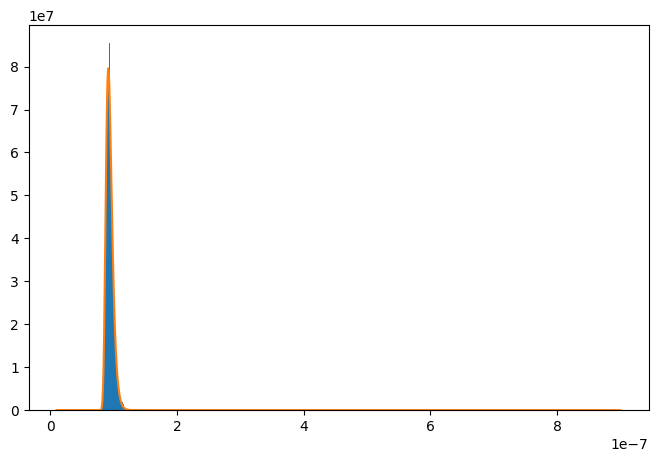

In [43]:
# x = np.linspace(2e-7,5e-7, 1001)
x = np.linspace(1e-8,9e-7, 1001)

ray_cdf = (1-np.exp(-(x**2)/tau_1f)) ** Nsamp
ray_pdf = np.gradient(ray_cdf, x[1]-x[0])
# ray_pdf = ray_pdf/np.trapz(ray_pdf)

N = 10000

lots_of_noise = rng.multivariate_normal([0,0],np.eye(2)*tau_1f/2, N*Nsamp)
lots_of_noise = lots_of_noise[:,0] + 1j * lots_of_noise[:,1]
lots_of_noise = lots_of_noise.reshape(N, Nsamp)
lots_of_noise = np.max(abs(lots_of_noise),axis=1)


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()

hist = ax.hist(lots_of_noise,bins=100, density=True)
ax.plot(x,  ray_pdf);
# ax.set_xlim(2.5e-7, 4.5e-7)


[0.00154194]


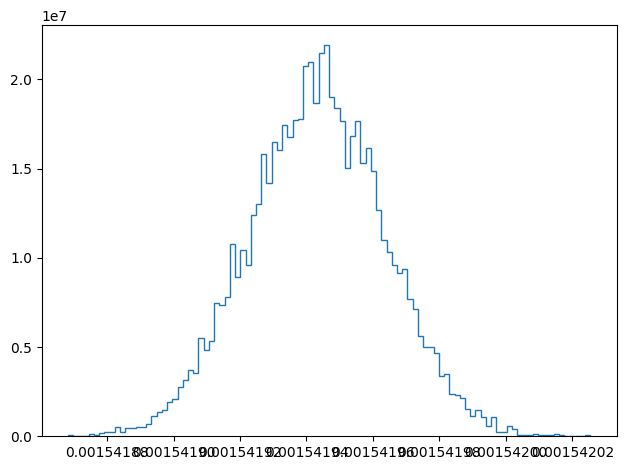

10000


In [78]:
N = 10000
scale_factor = 1

# peaks = np.array(
#     [5e-7-1j*5e-7,
#      3e-7+1j*3e-7,
#      3e-7-1j*3e-7,
#      2e-7+1j*2e-7]) * scale_factor
# peak_inds = np.array([2000, 2500, 3000, 3500])

# peaks = np.array(
#     [5e-7-1j*5e-7,
#      ]) * scale_factor

# peak_inds = np.array([2500])   

# peaks = np.array(
# [0.03e-4 + 1j*0.01e-4])

peaks = np.array([complex_signal_max])



peak_inds = np.array([50])

print(np.abs(peaks))

lots_of_noise = rng.multivariate_normal([0,0],np.eye(2)*tau_1f/2, N*Nsamp)
lots_of_noise = lots_of_noise[:,0] + 1j * lots_of_noise[:,1]
lots_of_noise = lots_of_noise.reshape(N, Nsamp)
noise_maxima = np.max(abs(lots_of_noise),axis=1)

lots_of_noise[:, peak_inds] += peaks
signal_maxima = np.max(abs(lots_of_noise),axis=1)

plt.figure()
plt.hist(signal_maxima, bins=100, density=True, histtype='step', label='Hist')
plt.tight_layout()
plt.show()

print(len(noise_maxima))


20481


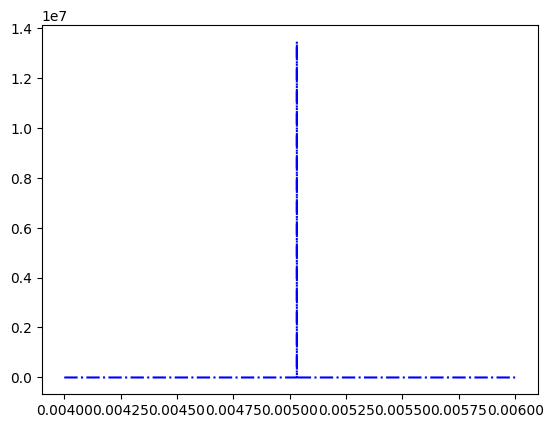

In [45]:
# y = np.linspace(1e-7, 9e-7, 2001)

y = np.linspace(1e-6, 10e-6, 20001)

y = np.linspace(4e-3, 6e-3, 20001)



# rice_pdf1 = 2*(y / tau_60f) * np.exp(-(y**2 + abs(peaks[0])**2)/(1*tau_60f))*special.i0(2*y*abs(peaks[0])/ tau_60f)
rice_pdf2 = scipy.stats.rice.pdf(y, abs(peaks[0])/np.sqrt(tau_1f/2), scale=np.sqrt(tau_1f/2))

# plt.plot(y, rice_pdf1, color='red')
plt.plot(y, rice_pdf2, ls='-.', color='blue')

# plt.xlim(1e-7, 9e-7)
# plt.ylim(0, 2.5e7)

rice_cdf = np.ones(20001)
for peak in peaks:
    rice_cdf *= scipy.stats.rice.cdf(y, abs(peak)/np.sqrt(tau_1f/2), scale=np.sqrt(tau_1f/2))
    
signal_cdf = rice_cdf * (1-np.exp(-(y**2)/tau_1f)) ** (Nsamp-peaks.size)

signal_pdf = np.gradient(signal_cdf, y[1]-y[0])

print(Nsamp)

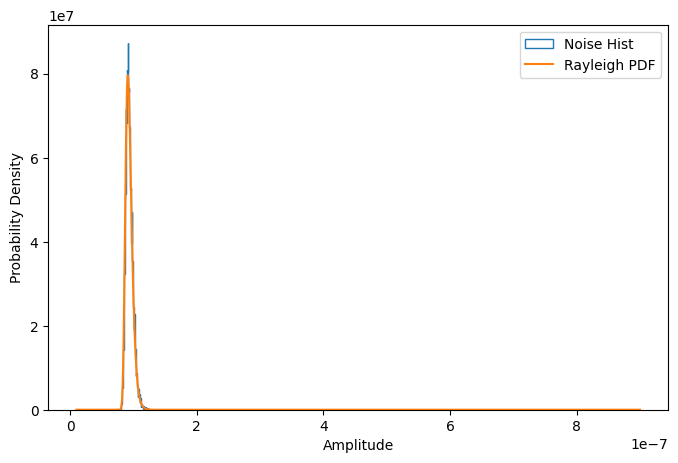

In [46]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

hist = ax.hist(noise_maxima, bins=100, density=True, histtype='step', label='Noise Hist' )
# hist = ax.hist(signal_maxima, bins=100, density=True, histtype='step', label='Hist')

ax.plot(x, ray_pdf, label='Rayleigh PDF')
# ax.plot(y, signal_pdf, label = 'Signal PDF')

ax.set_xlabel('Amplitude')
ax.set_ylabel('Probability Density')

# ax.set_xlim(0.003, 0.0032)

ax.legend();

# Batch Test for Harmonic:

Caveat: I've used the same impedance for the noise for all samples, less than a factor of 10 error with this. Ranges abit 400-600 Ohms

[0.00154194]
[0.00198199]
[0.00227195]
[0.00237833]
[0.00306892]
[0.00222479]
[0.00503162]


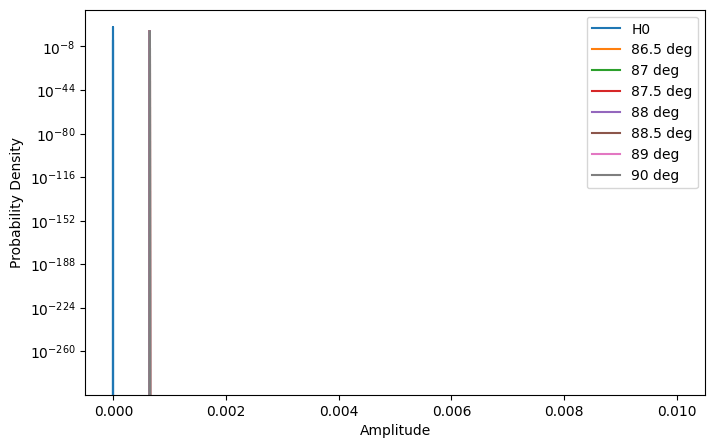

In [ ]:
import seaborn as sns


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

harmonic_angles = ['86.5', '87', '87.5', '88', '88.5', '89', '90']
data_paths = '../data/harmonic/**/*.h5'

file_list = ['harmonic/86p5deg/out_0aa72c89-416e-4f11-8eda-ae7542078817.h5', 
    'harmonic/87deg/out_0a5c4e19-2fc3-4f5c-9090-8d2cce62ae19.h5', 
    'harmonic/87p5deg/out_0c7fdf39-0ea3-4c84-9a9d-60c68b480bb1.h5', 
    'harmonic/88deg/out_0ad74f8f-ec02-44f5-a5af-5c69bef4774e.h5',
    'harmonic/88p5deg/out_0a1bc7f8-6e25-47f3-9743-f404227c3d0b.h5',
    'harmonic/89deg/out_0fa281cf-4941-4498-9497-391679cd663b.h5',
    'harmonic/90deg/out_0a5a3368-a72b-4392-9ccd-bbcaf9762cbd.h5']


###

for i, angle in enumerate(harmonic_angles):


    N = 10000
    scale_factor = 1
    
    file = file_list[i]
    
    signal_strings, attributes, attrs_container = get_attributes(file)
    signal = get_signal(file, 'signal1') # One polarisation
    signal_FFT = np.fft.rfft(signal)

    signal_max = np.max(abs(signal_FFT))
    signal_max_index = np.argmax(abs(signal_FFT))
    complex_signal_max = signal_FFT[signal_max_index]
    

    # Make two plots side by side with log y scale and no log y scale

    # title = str(len(signal_FFT)) + " point FFT of " + file


    # fig, axs = plt.subplots(1,2)
    # fig.suptitle(title)

    # axs[0].set_xlabel('Frequency')
    # axs[0].set_ylabel('Amplitude')
    # axs[0].set_title('Linear Scale')
    # axs[0].plot(abs(signal_FFT))
    
    # axs[1].plot(abs(signal_FFT))
    # axs[1].set_yscale('log')
    # axs[1].set_xlabel('Frequency')
    # axs[1].set_ylabel('Amplitude')
    # axs[1].set_title('Log Scale')  
    # plt.show();

    peaks = np.array([complex_signal_max])

    peak_inds = np.array([signal_max_index])

    print(np.abs(peaks))

    lots_of_noise = rng.multivariate_normal([0,0],np.eye(2)*tau_1f/2, N*Nsamp) # Generates a massive set of noise values
    lots_of_noise = lots_of_noise[:,0] + 1j * lots_of_noise[:,1] # Converts the noise values to complex numbers
    lots_of_noise = lots_of_noise.reshape(N, Nsamp) # Reshapes the noise values into a 2D array
    noise_maxima = np.max(abs(lots_of_noise),axis=1) # Finds the maximum value of the absolute value of the noise values

    lots_of_noise[:, peak_inds] += peaks # Adds the signal peaks to the noise values
    signal_maxima = np.max(abs(lots_of_noise),axis=1) # Finds the maximum value of the absolute value of the noise values
    
    
    # generate a seaborn plot for noise and for signal
    
    # sns.lineplot(x=np.arange(0, N), y=signal_maxima, ax=ax, label=angle)
    # sns.lineplot(x=np.arange(0, N), y=noise_maxima, ax=ax, label='Noise')
    
    
    
    
    y_samples = 1001
        
    y = np.linspace(1e-7, 1e-2, y_samples)
    x = np.linspace(1e-8, 1e-6, 1001)


    rice_cdf = np.ones(y_samples)
    for peak in peaks:
        rice_cdf *= scipy.stats.rice.cdf(y, abs(peak)/np.sqrt(tau_1f/2), scale=np.sqrt(tau_1f/2))
        
    signal_cdf = rice_cdf * (1-np.exp(-(y**2)/tau_1f)) ** (Nsamp-peaks.size)

    signal_pdf = np.gradient(signal_cdf, y[1]-y[0])

    
    if i == 0:
        # hist = ax.hist(noise_maxima, bins=100, density=True, histtype='step', label='Noise Hist' )
        ax.plot(x, ray_pdf, label='H0')



    ####
    # hist_label = angle + ' deg'
    # hist = ax.hist(signal_maxima, bins=100, density=True, histtype='step', label=hist_label)
    sig_label = angle + ' deg'
    ax.plot(y, signal_pdf, label = sig_label)

    ax.set_xlabel('Amplitude')
    ax.set_ylabel('Probability Density')
    
    # if i == 0:
    #     break
    

# ax.set_xlim(0.003, 0.0032)

# ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.show();

1000
1000


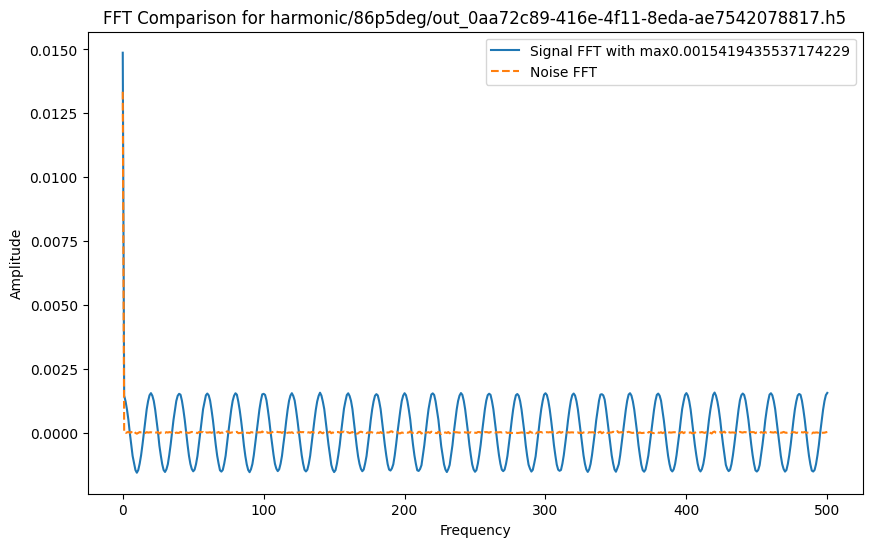

1000
1000


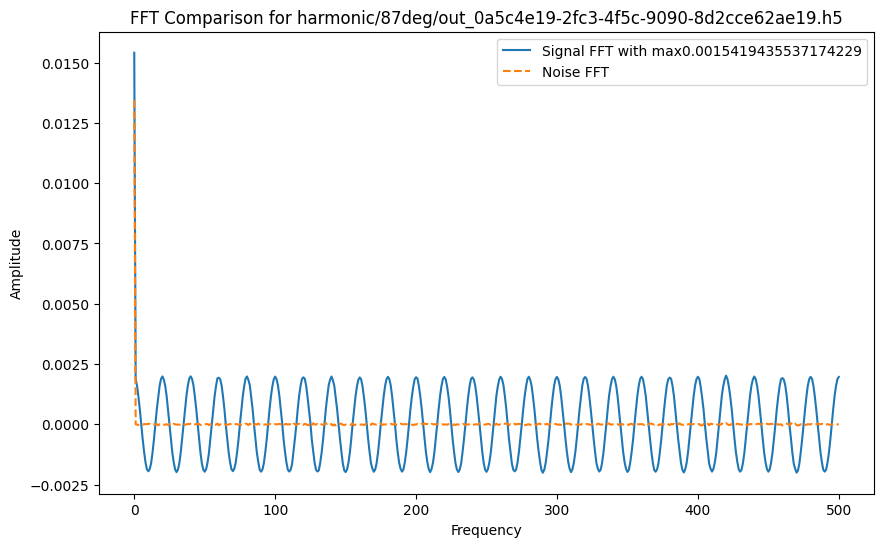

1000
1000


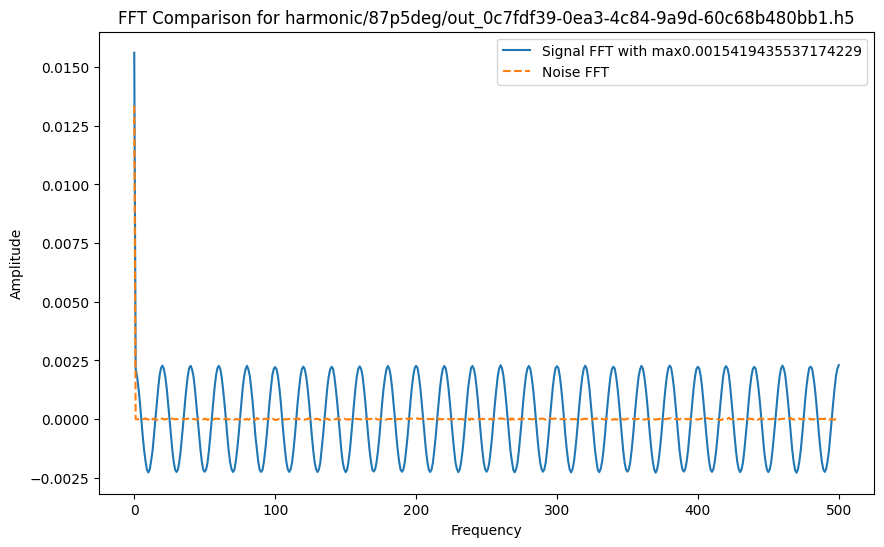

1000
1000


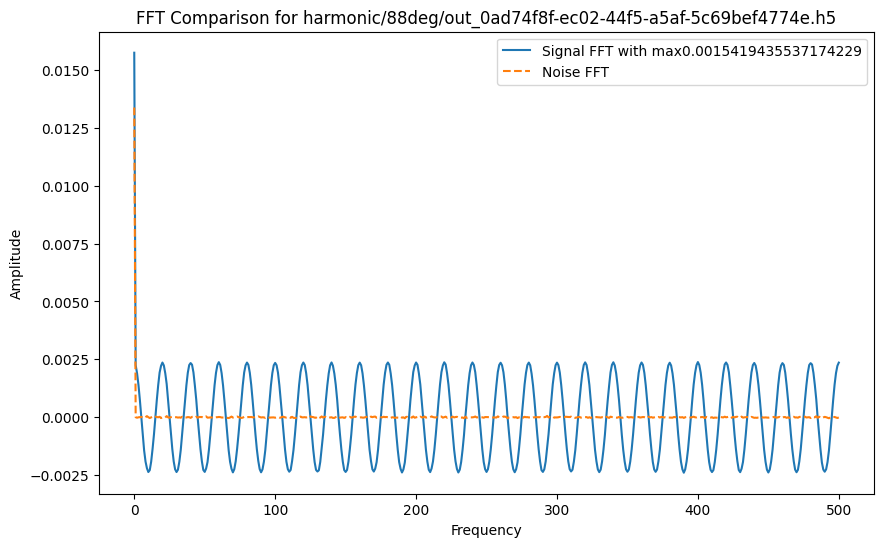

1000
1000


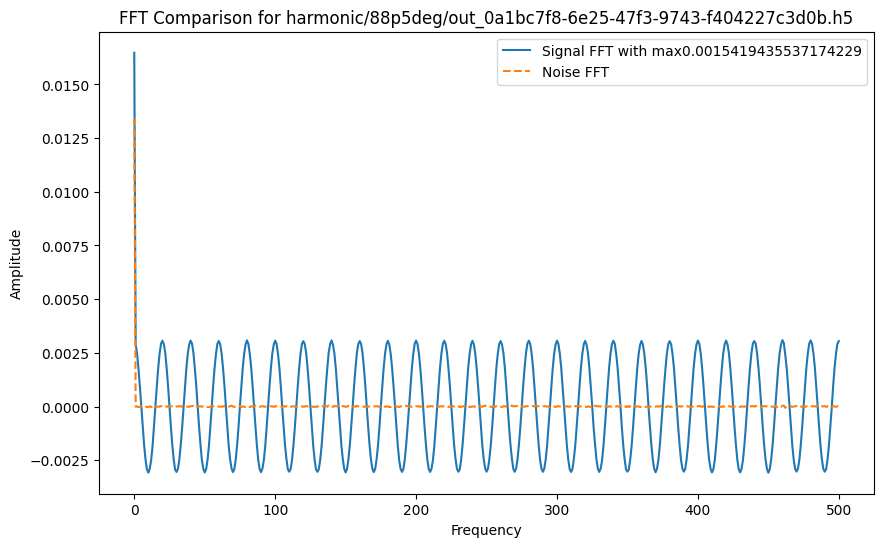

1000
1000


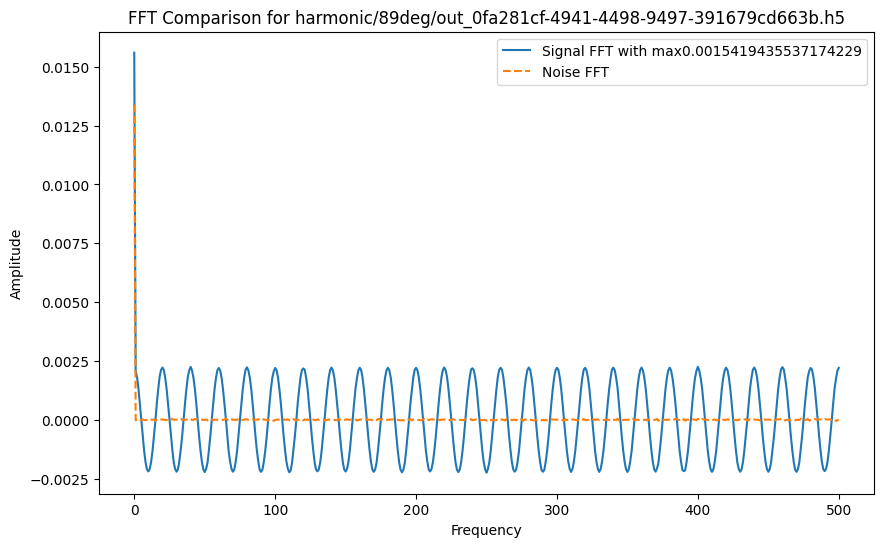

1000
1000


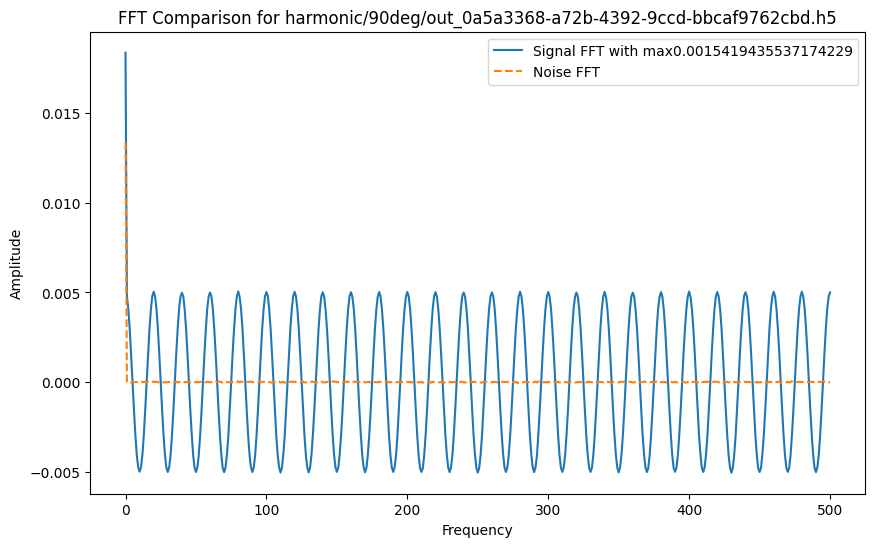

In [ ]:
# List of files to process
file_list = [
    'harmonic/86p5deg/out_0aa72c89-416e-4f11-8eda-ae7542078817.h5', 
    'harmonic/87deg/out_0a5c4e19-2fc3-4f5c-9090-8d2cce62ae19.h5', 
    'harmonic/87p5deg/out_0c7fdf39-0ea3-4c84-9a9d-60c68b480bb1.h5', 
    'harmonic/88deg/out_0ad74f8f-ec02-44f5-a5af-5c69bef4774e.h5',
    'harmonic/88p5deg/out_0a1bc7f8-6e25-47f3-9743-f404227c3d0b.h5',
    'harmonic/89deg/out_0fa281cf-4941-4498-9497-391679cd663b.h5',
    'harmonic/90deg/out_0a5a3368-a72b-4392-9ccd-bbcaf9762cbd.h5'
]

# Iterate over each file
for file in file_list:
    # Extract the signal from the file
    signal_strings, attributes, attrs_container = get_attributes(file)
    signal = get_signal(file, 'signal1')
    signal_FFT = np.fft.rfft(signal)

    signal_max = np.max(abs(signal_FFT))
    signal_max_index = np.argmax(abs(signal_FFT))
    complex_signal_max = signal_FFT[signal_max_index]
    
    
    
    # Generate noise
    noise_1t = rng.multivariate_normal([0,0], np.eye(2) * tau_1t/2, Nsamp * 1000)
    noise_1t = noise_1t[:,0] + 1j * noise_1t[:,1]
    noise_1t = noise_1t.reshape(1000, Nsamp)
    noise_1t = np.max(abs(noise_1t), axis=1)
    
    print(len(noise_1t))
    
    noise_MAX = noise_1t
    
    signal_1t = np.copy(noise_1t)
    
    signal_1t[50] =+ abs(complex_signal_max)
    
    noise_FFT = np.fft.rfft(noise_1t)
    signal_FFT = np.fft.rfft(signal_1t)

    # signal_MAX = np.max(abs(signal_FFT))
    
    
    
    # plt.hist(noise_1t, bins=100, density=True)
    # # plt.hist(signal_1t, bins=10000, density=True)
    # plt.xlim(0, 0.0001)
    # plt.show
    
    print(len(signal_1t))    

    # plt.plot(signal_1t)
    # plt.plot(noise_1t)
    # plt.show()


    # Plot the signal FFT and noise FFT
    plt.figure(figsize=(10, 6))
    
    signal_label = 'Signal FFT with max' + str(np.max(signal_MAX))
    
    plt.plot(n, label=signal_label)
    plt.plot(noise_FFT, label='Noise FFT', linestyle='--')
    # plt.yscale('log')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.title(f'FFT Comparison for {file}')
    plt.legend()
    plt.show()

In [58]:
print(Nsamp)

20481


In [60]:
len(noise_FFT)

10241